# HW 6 : Hand written digits recognition

## First step : loading and processing the data
Load the images into a numpy array

In [18]:
import numpy as np
import pandas as pd

In [19]:
# Creation of a dataframe to hold the images
data_set = pd.read_csv("image_0.txt", header=None, names=\
                      ["Pixel_"+str(x) for x in range(400)])
print(data_set.info())
data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 400 entries, Pixel_0 to Pixel_399
dtypes: float64(395), int64(5)
memory usage: 15.3 MB
None


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_390,Pixel_391,Pixel_392,Pixel_393,Pixel_394,Pixel_395,Pixel_396,Pixel_397,Pixel_398,Pixel_399
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Now we add the labels to the data set

In [20]:
data_set["Label"] = pd.read_csv("label.txt", header=None, names=["Label"])
# Replace the 10s with actual zeros
def ten_to_zero(x):
    if x == 10:
        return 0
    return x
data_set["Label"] = data_set["Label"].apply(func=ten_to_zero)
# Reorganize the columns so that Label is first on the list
cols = data_set.columns.tolist()
cols = cols[-1:] + cols[:-1]

data_set = data_set[cols]

print(data_set.info())
data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 401 entries, Label to Pixel_399
dtypes: float64(395), int64(6)
memory usage: 15.3 MB
None


,Label,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,...,Pixel_390,Pixel_391,Pixel_392,Pixel_393,Pixel_394,Pixel_395,Pixel_396,Pixel_397,Pixel_398,Pixel_399
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
def split_train_test(data, proportion=0.8):
    shuffled_data = data.sample(frac=1).reset_index(drop=True)
    
    train_data = shuffled_data[:int(0.8 * shuffled_data.shape[0])]\
            .reset_index(drop=True)
    test_data = shuffled_data[int(0.8 * shuffled_data.shape[0]):]\
            .reset_index(drop=True)
    
    return train_data, test_data

In [22]:
# Test the split function
train_data, test_data = split_train_test(data_set)
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 401 entries, Label to Pixel_399
dtypes: float64(395), int64(6)
memory usage: 12.2 MB
None


## Now we define the parameters of our model
* We define a function to initialize parameteres randomly
* Each layer of neurons should have a parameter matrix of shape (m, n) where m is the size of the output of the previous layer (or the size of the input in the case of the first layer) + 1, to add the intercept, and n is the number of neurons in this layer.

### Example
For instance if we have a network with 400 inputs, 25 neurons in the first layer and 10 in the second, we should have parameters like so : 
* First layer : (401, 25)
* Second layer : (26, 10)

In [23]:
def initialize_parameters(layers, n_inputs=400):
    """
        layers is a list. Each of its item represents one layer, and 
    the number it contains is the size of that layer. The last layer
    should always have the size of the expected output (in our case 10)
        Our model will then apply argmax to these 10 numbers to find out 
    which digit was detected.
    
        The return value is a dic containing a numpy array for each set
    of parameters
    """
    parameters = []
    
    slices = [n_inputs] + layers
    
    # We loop throught the number of layers to generate parameters
    # matrix of the appropriate size
    for i, layer in enumerate(layers):
        
        parameters.append(\
        np.random.randn((slices[i]+1), slices[i+1]))
        parameters[i] = parameters[i] * 0.1
        
    return parameters

In [24]:
# Test the function
layers = [25, 10]
params = initialize_parameters(layers)
for row in params:
    print(row.shape)
    
print(params[0][0, 0])

(401, 25)
(26, 10)
0.16691384829573086


## Implement the feed forward function
This step is just a couple of matrix multiplication, which are easy to implement and run very fast thanks to numpy.

To make it work, we must first define the sigmoid function that we will
be using for activation.

In [25]:
def sigmoid(x):
    return np.power(1 + np.exp(-x), -1)

In [26]:
def feed_forward_batch(batch, params):
    """
        Given a batch of inputs, this function will return an equivalent
    batch of outputs. The intermediate values are also returned so they
    can be cached for back propagation.
    
    * Inputs : batch must be a numpy array of shape m * 400 where m
    represents the batch size, and 400 is the size of the images
    
    * Outputs : All of the intermediate and final values of our feed_forward
    are contained in results. It is a list of dics.
    Each dic contains two entries, Xbarbar which is the sum before the 
    sigmoid activation function, and F which does contain the activation
    function
    """
    # X is the matrix of values taht we will feed to the neural
    # network
    X = np.copy(batch)
    image_size = X.shape[0]
    
    results = []
    
    
    for i, param_matrix in enumerate(params):
        results_dic = {}
        # We pad the batch with a row of ones to create an intercept
        Xbar = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)
        # We store the results from before the multiplication with 
        # the params for the need of the backpropagation
        results_dic["pre_multi"] = Xbar
        # Then we multiply the padded batch of vectors with the params
        Xbarbar = np.dot(Xbar, param_matrix)
        # We cache the results for faster backprop
        results_dic["pre_activation"] = Xbarbar
        # Then we need to apply the activation function to the product
        F = sigmoid(Xbarbar)
        # We also store the results from after this operation because
        # at this point why not
        results_dic["post_activation"] = F
        # Finally we put F into X to allow for the next step of the loop
        X = F
        
        results.append(results_dic)
        
    # Once this loop is completed, we should have our output ready
    return results

In [27]:
# Test of the feed_forward function
print(train_data.drop(["Label"], axis=1).values.shape)
X = train_data.drop(["Label"], axis=1).values
Y = train_data["Label"].values
results = feed_forward_batch(X, params)
Y_hat = results[-1]["post_activation"]
print(Y_hat.shape)
print(np.argmax(Y_hat, axis=1))
print(np.argmax(Y_hat, axis=1).shape)

(4000, 400)
(4000, 10)
[2 2 2 ... 2 2 3]
(4000,)


## Implement the back propagation
We are now able to run our model to predict a result. We now need to implement the back propagation algorith to modify the parameters in the direction of the right result.

* Helper functions

In [28]:
def revert_argmax(x):
    """
    First let's make a function to convert a number between 0 and 9
    to a vector of numbers between 0 and 1
    """
    return_value = np.zeros((10))
    return_value[x] = 1
    return return_value

def revert_argmax_vectorized(x):
    """
    x is a numpy vector
    """
    return_value = np.zeros((x.shape[0], 10))
    
    for i, value in enumerate(x):
        return_value[i, value] = 1
    
    return return_value

def compute_SSE(Y_hat, Y):
    SE = np.power(Y_hat - Y, 2)
    SSE = np.sum(SE)
    return SSE

def compute_cost(Y_hat, Y):
    """
    Y_hat and Y must be (m, 10) dimensional matrices or vectors
    """
    assert Y_hat.shape[1] == 10
    cost = Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)
    return np.sum(cost) / Y_hat.shape[0]

def accuracy_eval(Y_hat, Y):
    """
    Y_hat and Y must be matrices of shape (m, 10) where me is the number of examples
    """
    got_it = 0
    for i in range(Y_hat.shape[0]):
        if np.argmax(Y_hat[i]) == Y[i]:
            got_it += 1
            
    accuracy = got_it / Y_hat.shape[0]
    
    return accuracy, got_it

def test_model(test_data, model):
    X_test = test_data.drop(["Label"], axis=1).values
    Y_test = test_data["Label"].values

    test_results = feed_forward_batch(X_test, model)
    
    accuracy, _ = accuracy_eval(test_results[-1]["post_activation"], Y_test)
    print("Accuracy : ", accuracy * 100, "%")
    
    return test_results

* Actual back propagation

In [29]:
"""
 This part was only for tests nut now I am afraid to delete it please ignore
"""

def one_layer_back_propagate(params, results, Y, learning_rate=0.1):
    """
    * Params must be a numpy matrix containing the parameters for
    one layer.
    * Results contains the result of a layer
    """
    return None

def back_propagate_custom(params, results, Y, learning_rate=0.1):
    """
    This function will run backwards through the neural net, computing 
    the derivatives to modify the parameters according to the learning
    rate.
    
    * Y should be a (batch_size, 10) matrix.
    * results contains all of the results from the backpropagation,
    layer by layer.
    """
    Y_hat = results[-1]["post_activation"]

In [30]:
def back_propagate(params, results, Y, learning_rate=0.1):
    """
    ========= IMPORTANT ===========
    This version of the function is not generealisable to different
    number of layers.
    
    This function will run backwards through the neural net, computing 
    the derivatives to modify the parameters according to the learning
    rate.
    
    * Y should be a (batch_size, 10) matrix.
    * results contains all of the results from the backpropagation,
    layer by layer.
    """
    Y_hat = results[-1]["post_activation"]
    
    G = results[-1]["post_activation"]
    Fbar = results[-1]["pre_multi"]
    F = results[0]["post_activation"]
    Xbar = results[0]["pre_multi"]
    W = params[-1][1:]
    
    # This first version doesn't use a loop and therefore is not capable of handling
    # networks of different sizes
    dE_dW = np.transpose(Fbar) @ ((G - Y) * G * (1-G))
    dE_dW /= Y_hat.shape[0]
    
    dE_dV = (G - Y) * G * (1-G)
    dE_dV = dE_dV @ np.transpose(W)
    dE_dV = dE_dV * F * (1 - F)
    dE_dV = np.transpose(Xbar) @ dE_dV
    dE_dV /= Y_hat.shape[0]
    
    # We update the parameters
    params[0] -= learning_rate * dE_dV
    params[1] -= learning_rate * dE_dW
    
    return params

In [31]:
# Test de la fonction avec un Y de 4
new_params = back_propagate(params, results, revert_argmax(4), learning_rate=0.1)

## Implementation of the full algorithm
 Now that all of the important functions are here, we are ready to create our train function

In [48]:
def train_model(train_data, layers, batch_size, stop_threshold=0, n_iterations=30,\
                learning_rate=0.1, verbose=True, test_data=None):
    """
    Train_data is the dataframe we have created
    If stop threshold is 0 we run for a set number of iterations.
    Else, we run until the progress we make on the error is under a certain number or the number of
    iterations is reached, whichever comes first
    """
    # First, we initialise the parameters
    params = initialize_parameters(layers)
    
    # Then we split the training data between X and Y
    X = train_data.drop(["Label"], axis=1).values
    Y = revert_argmax_vectorized(train_data["Label"].values)
    
    # We loop through the iterations
    itera = 0
    stop = False
    SSE_list = []
    while not stop:
        # This is where we split the training data into batches
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i+batch_size, :]
            Y_batch = Y[i:i+batch_size, :]
        
            # We feed the data to the model
            results = feed_forward_batch(X_batch, params)

            # We measure the SSE
            SSE = compute_SSE(results[-1]["post_activation"], Y_batch)

            # Actual training
            params = back_propagate(params, results, Y_batch, learning_rate)
            
        # We store our SSE so we can make graphs later
        SSE_list.append(SSE)
        if verbose and itera%10 == 0:
            print("Iteration : ", itera, "\tSSE = ", SSE)
            test_model(test_data, params)
        
        itera += 1
        if n_iterations != None:
            if itera >= n_iterations:
                stop = True
        if len(SSE_list) > 1:
            if np.abs(SSE_list[-1] - SSE_list[-2]) < stop_threshold:
                stop = True
                
    return params, SSE_list

In [53]:
train_data, test_data = split_train_test(data_set, 0.8)

model, SSE_list = train_model(train_data, [50, 10], 10, stop_threshold=0, n_iterations=300,\
                learning_rate=0.1, verbose=True, test_data=test_data)



Iteration :  0 	SSE =  8.890441828154064
Accuracy :  33.300000000000004 %
Iteration :  10 	SSE =  2.339040152140559
Accuracy :  86.6 %
Iteration :  20 	SSE =  1.373626856370678
Accuracy :  90.60000000000001 %
Iteration :  30 	SSE =  0.9908159451409607
Accuracy :  91.8 %
Iteration :  40 	SSE =  0.7552060172639183
Accuracy :  92.0 %
Iteration :  50 	SSE =  0.5862720218639379
Accuracy :  92.60000000000001 %
Iteration :  60 	SSE =  0.45780279958584613
Accuracy :  92.7 %
Iteration :  70 	SSE =  0.3607632990738938
Accuracy :  92.9 %
Iteration :  80 	SSE =  0.28887864255212997
Accuracy :  93.0 %
Iteration :  90 	SSE =  0.23567139090178832
Accuracy :  93.10000000000001 %
Iteration :  100 	SSE =  0.19567306001130402
Accuracy :  93.5 %
Iteration :  110 	SSE =  0.16507201690735046
Accuracy :  93.4 %
Iteration :  120 	SSE =  0.14133422560313422
Accuracy :  93.7 %
Iteration :  130 	SSE =  0.12273102083043887
Accuracy :  93.8 %
Iteration :  140 	SSE =  0.1080505621659409
Accuracy :  94.0 %
Iteration

## How to evaluate accuracy

In [54]:
# We test our model
print("train")
train_acc = test_model(train_data, model)
print("test")
test_results = test_model(test_data, model)

train
Accuracy :  97.82499999999999 %
test
Accuracy :  94.6 %


In [35]:
for param in model:
    print(param.shape)

(401, 50)
(51, 10)


## Test recognizing a picture
* Now that our model is  trained, we can try it with different pictures to see what our model is capable of.

In [36]:
def get_one_result(model, X):
    """
    X is an image of size 400 that we can feed to our model
    """
    X = np.reshape(X, (1, 400))
    result = feed_forward_batch(X, model)
    Y_hat = result[-1]["post_activation"]
    
    predicted = np.argmax(Y_hat, axis=1)
    return predicted

In [37]:
# We would also like to have a function to see what these numbers look like
import matplotlib.pyplot as plt

def draw_number(X):
    """
    X should be of size 400, Y should be a number.
    """
    pixels = X.reshape((20, 20))
    pixels = np.transpose(pixels)

    plt.imshow(pixels, cmap='gray_r',origin='upper')
    plt.show()

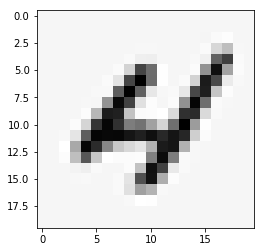

Prediction :  5


In [38]:
X = data_set.loc[2100].drop(["Label"]).values
draw_number(X)
print("Prediction : ", get_one_result(model, X)[0])

# Analyze the results

Now that we have trained our model, we want to figure out what it doesn't do well.
We start by isolating all the numbers on which we failed.

In [39]:
# Get the results of the test
test_outputs = test_results[-1]["post_activation"]
number_predicted = np.argmax(test_outputs, axis=1)

# Error will contain all the images that were mispredicted
errors = pd.DataFrame()
for i, predicted in enumerate(number_predicted):
    if test_data.loc[i]['Label'] != predicted:
        errors = errors.append(test_data.loc[i])
        
print(errors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 999
Columns: 401 entries, Label to Pixel_99
dtypes: float64(401)
memory usage: 2.4 MB
None


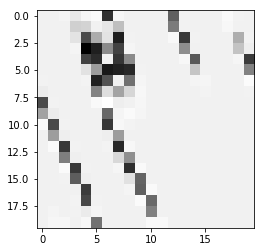

Expected : 2.0
Prediction : 6


In [40]:
check = 0
X = errors.iloc[check].drop(["Label"]).values
draw_number(X)
print("Expected :", errors.iloc[check]["Label"])
print("Prediction :", get_one_result(model, X)[0])

Generate a random number 